06-1 군집 알고리즘

prob)
소비자가 올린 과일 분류

비지도 학습 : 타깃을 모르는 상태에서, 스스로 모델이 학습하고 입력 데이터를 분류 or 예측

-> 사진의 픽셀값을 모두 평균내서 과일을 분류해 보자

In [6]:
#과일 사진 데이터 준비

import wget

# 다운로드할 URL 및 저장할 파일 이름
url = "https://bit.ly/fruits_300_data"
output = "fruits_300_data.npy"

wget.download(url, out=output)


 53% [.......................................                                   ] 1605632 / 3000128

100% [..........................................................................] 3000128 / 3000128

'fruits_300_data (3).npy'

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
fruits = np.load('fruits_300_data.npy')

In [9]:
print(fruits.shape)

(300, 100, 100)


(샘플 개수, 이미지 높이, 이미지 너비)

이미지 크기 : 100 * 100

-> 각 픽셀은 넘파이 배열의 원소 하나에 대응하므로, 배열의 크기가 100 * 100

In [10]:
#첫번째 이미지의 첫번 째 행 모두 출력(이미지의 첫번 째 행 픽셀값들만 모두 출력한 것)

print(fruits[0, 0, :])

[  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   2   1
   2   2   2   2   2   2   1   1   1   1   1   1   1   1   2   3   2   1
   2   1   1   1   1   2   1   3   2   1   3   1   4   1   2   5   5   5
  19 148 192 117  28   1   1   2   1   4   1   1   3   1   1   1   1   1
   2   2   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1]


이 넘파이 배열은 흑백 사진을 담고 있으므로, 0~225까지의 정숫값을 가짐


0에 가까움 : 어둡게

높은 값 : 밝게

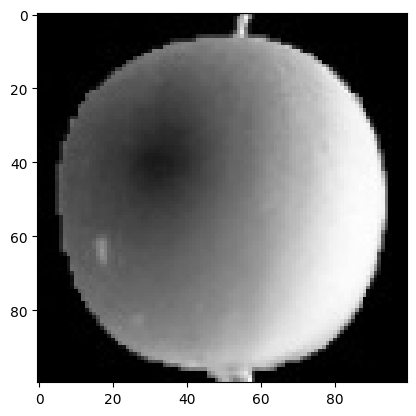

In [11]:
#시각화

plt.imshow(fruits[0], cmap='gray')
plt.show()

#흑백 이미지 이므로, cmap 매개변수를 gray로 지정

보통의 흑백 이미지 : 바탕이 밝고, 물체가 짙은 색

-> 위 이미지는 넘파이 배열로 변환시, 반전 시킨 것

-> 컴퓨터가 이미지를 인식할 때, 255와 같이 높은 값에 더 집중하므로 물체를 밝게(높은값), 바탕을 어둡게(낮은값) 반전 시킨 것

(반전 시키지 않으면, 컴퓨터가 이미지를 학습할 때 높은값인 바탕에 집중하게 될 것)

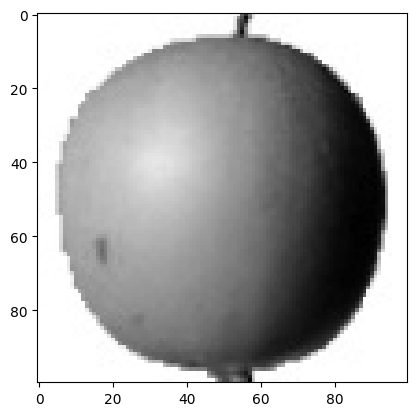

In [12]:
#위 이미지를 다시 반전 시켜서, 사람이 보기 쉬운 형태로 시각화

plt.imshow(fruits[0], cmap='gray_r')
plt.show()

위 이미지에서

밝은 부분 : 0에 가까움

어두운 부분 : 높은 값

-> 넘파이 배열 상

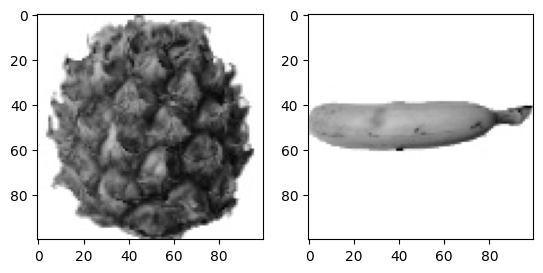

In [13]:
#바나나, 파인애플 이미지도 출력

fig, axs = plt.subplots(1, 2)
axs[0].imshow(fruits[100], cmap='gray_r')
axs[1].imshow(fruits[200], cmap='gray_r')
plt.show()

맷플롯립의 subplots() 함수를 사용 -> 여러개의 그래프를 배열처럼 쌓을 수 있도록 함

subplots() 함수의 두 매개변수는 그래프를 쌓을 행과 열을 지정 -> subplots(1, 2)

반환된 axs는 2개의 서브 그래프를 담고 있는 배열

axs[0]에 파인애플 이미지

axs[1]에 바나나 이미지


이 데이터의 처음 100개 : 사과, 다음 100개 : 파인애플, 다음 100개 : 바나나


픽셀값 분석하기)

fruits 데이터를 사과, 파인애플, 바나나로 각각 나누기

-> 넘파이 배열을 나눌때 100 * 100 이미지를 펼쳐서 길이가 10,000인 1차원 배열로 만들기(배열 계산 시 편리)

In [14]:
#슬라이싱 연산자 사용하여 fruits 배열에서 순서대로 100개씩 선택
#그 다음에, reshape 메서드로 두번째 차원(100)과 세번째 차원(100)을 10,000으로 합침

#첫번째 차원 : -1로 지정하여 자동으로 남은 차원 할당 (샘플 개수)

apple = fruits[0:100].reshape(-1, 100*100)
pineapple = fruits[100:200].reshape(-1, 100*100)
banana = fruits[200:300].reshape(-1, 100*100)

#각 과일의 배열 : (100,10000)로 변경함

In [15]:
#배열 형태 확인

print(apple.shape)

(100, 10000)


In [16]:
#축을 지정하여 픽셀값의 평균 계산

#axis=0 : 첫번 째 축인 행을 따라 계산 -> 행이 1개가 됨
#axis=1 : 두번 째 축인 열을 따라 계산 -> 열이 1개가 됨

print(apple.mean(axis=1))

[ 88.3346  97.9249  87.3709  98.3703  92.8705  82.6439  94.4244  95.5999
  90.681   81.6226  87.0578  95.0745  93.8416  87.017   97.5078  87.2019
  88.9827 100.9158  92.7823 100.9184 104.9854  88.674   99.5643  97.2495
  94.1179  92.1935  95.1671  93.3322 102.8967  94.6695  90.5285  89.0744
  97.7641  97.2938 100.7564  90.5236 100.2542  85.8452  96.4615  97.1492
  90.711  102.3193  87.1629  89.8751  86.7327  86.3991  95.2865  89.1709
  96.8163  91.6604  96.1065  99.6829  94.9718  87.4812  89.2596  89.5268
  93.799   97.3983  87.151   97.825  103.22    94.4239  83.6657  83.5159
 102.8453  87.0379  91.2742 100.4848  93.8388  90.8568  97.4616  97.5022
  82.446   87.1789  96.9206  90.3135  90.565   97.6538  98.0919  93.6252
  87.3867  84.7073  89.1135  86.7646  88.7301  86.643   96.7323  97.2604
  81.9424  87.1687  97.2066  83.4712  95.9781  91.8096  98.4086 100.7823
 101.556  100.7027  91.6098  88.8976]


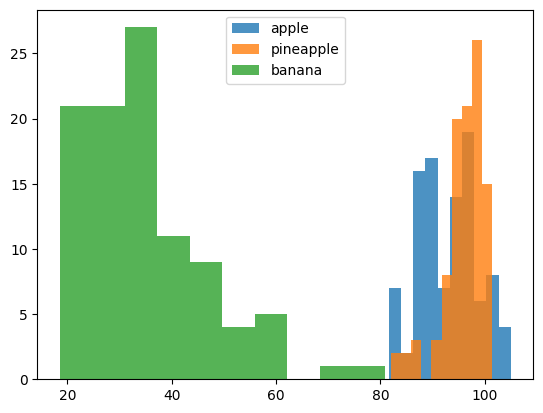

In [17]:
#히스토그램을 그려서 각 과일 100개에 대한 픽셀 평균값 시각화
#평균값이 어떻게 분포해 있는지 확인

plt.hist(np.mean(apple, axis=1), alpha=0.8)
plt.hist(np.mean(pineapple, axis=1), alpha=0.8)
plt.hist(np.mean(banana, axis=1), alpha=0.8)

plt.legend(['apple', 'pineapple', 'banana'])
plt.show()

바나나 사진의 평균값은 40 아래에 집중되어 있음

반면, 사과/파인애플 픽셀값 평균은 90~100 사이에 많이 모여 있음

바나나는 사진에서 차지하는 영역이 사과, 파인애플에 비해 적어서 납득이 되는 결과임을 알 수 있음


문제는 사과, 파인애플을 픽셀값의 평균으로 판단하기가 어려움(너무 겹쳐 있음)


sol)

각 샘플 별 픽셀값을 평균하여 비교하지 말고, 

전체 샘플에 대해 각 픽셀별 평균값을 계산해 보자

-> 세 과일은 모양이 다르므로 픽셀값이 높은 위치가 다를 것

(ex: 전체 사과 샘플 100개에서 각 픽셀별 평균값) 

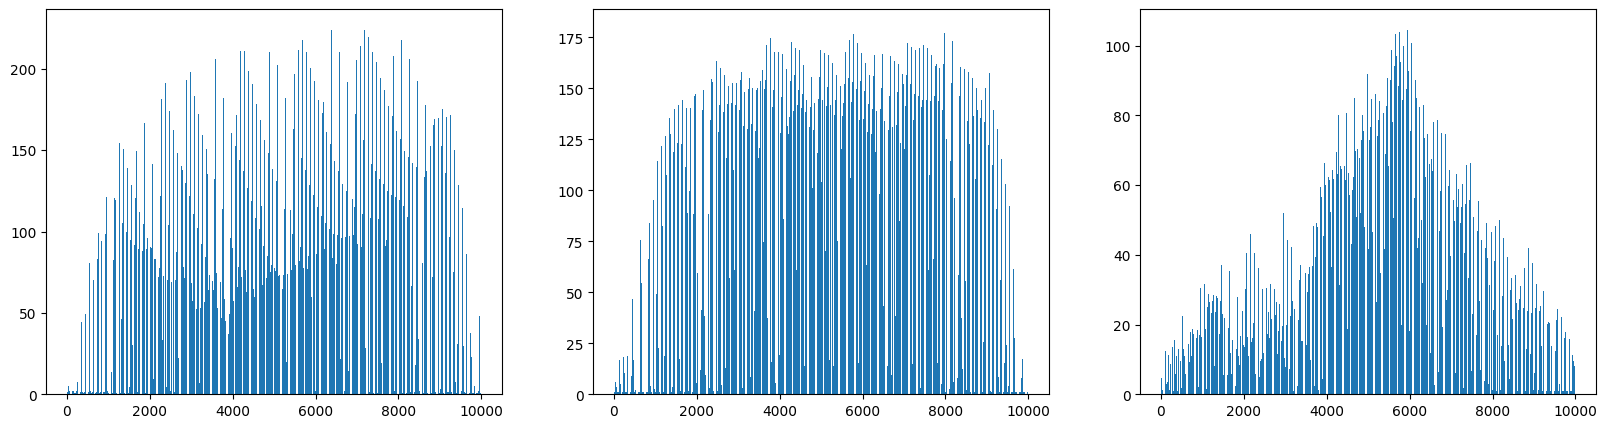

In [18]:
#전체 샘플에서 픽셀 별 평균

fig, axs = plt.subplots(1, 3, figsize=(20,5))
axs[0].bar(range(10000), np.mean(apple, axis=0))
axs[1].bar(range(10000), np.mean(pineapple, axis=0))
axs[2].bar(range(10000), np.mean(banana, axis=0))
plt.show()

전체 샘플의 픽셀별 평균 결과를 보면,

과일 별로 픽셀값이 높은 구간이 다름

사과 : 사진 아래쪽으로 갈 수록 높음

파인애플 : 비교적 고르면서 높음

바나나 : 중앙부가 높음

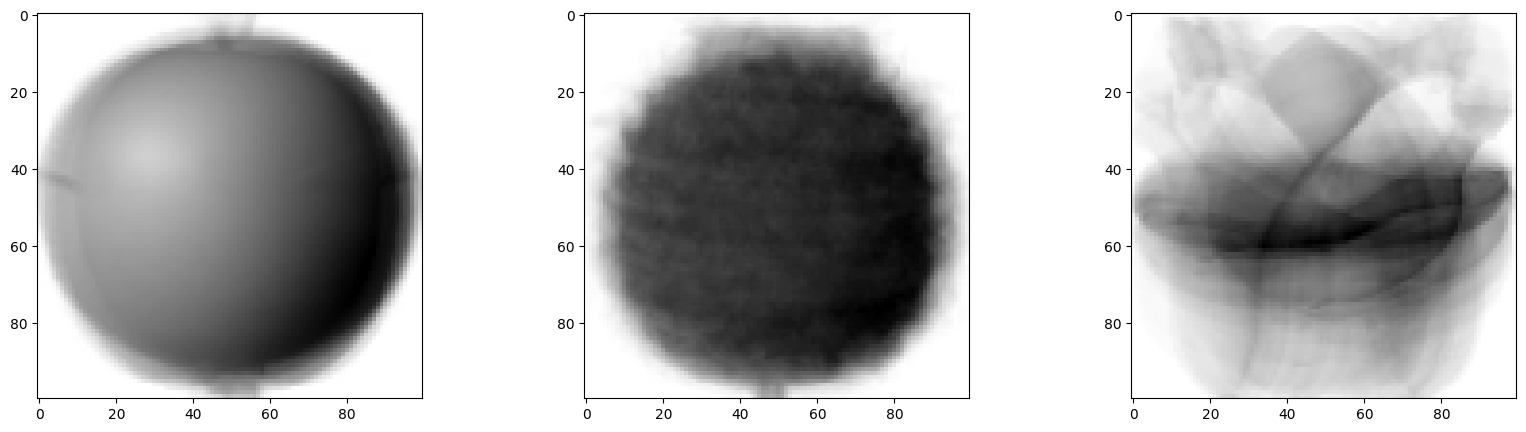

In [19]:
#픽셀 평균을 100 * 100 크기로 바꿔서 이미지처럼 출력해보기
#픽셀을 평균 낸 이미지를 모든 사진을 합쳐 놓은 대표 이미지로 볼 수 있음

apple_mean = np.mean(apple, axis=0).reshape(100, 100)
pineapple_mean = np.mean(pineapple, axis=0).reshape(100, 100)
banana_mean = np.mean(banana, axis=0).reshape(100, 100)

fig, axs = plt.subplots(1, 3, figsize=(20,5))
axs[0].imshow(apple_mean, cmap='gray_r')
axs[1].imshow(pineapple_mean, cmap='gray_r')
axs[2].imshow(banana_mean, cmap='gray_r')
plt.show()

세 과일은 픽셀 위치에 따라 값의 크기가 차이가 남

-> 따라서 이 대표 이미지와 가까운 사진을 골라내는 방식으로 과일을 분류할 수 있지 않을까 ?

평균값과 가까운 사진 고르기)

사과 사진의 평균값인 apple_mean과 가장 가까운 사진 골라봄

절댓값 오차 사용 : fruits 배열에 있는 모든 샘플에서 apple_mean을 뺀 절댓값의 평균을 계산

In [20]:

#절댓값 계산
#(300, 100, 100) 크기의 배열
abs_diff = np.abs(fruits - apple_mean)

#각 샘플에 대한 평균을 구하기 위해 axis에 2,3번째 차원 모두 지정
#abs_mean은 각 샘플의 오차 평균이므로, 크기가 300인 1차원 배열
abs_mean = np.mean(abs_diff, axis=(1,2))
print(abs_mean.shape)



(300,)


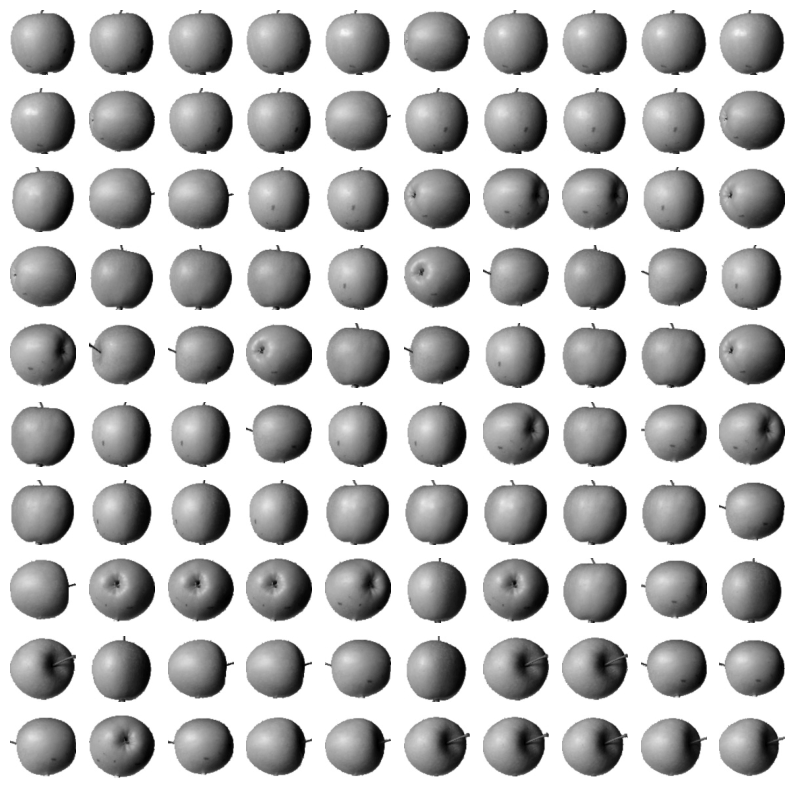

In [21]:
#이 값이 가장 작은 순서대로 100개 고르기
#apple_mean과 오차가 가장 작은 샘플 100개 고르기

apple_index = np.argsort(abs_mean)[:100]
fig, axs = plt.subplots(10, 10, figsize=(10,10))
for i in range(10):
    for j in range(10):
        axs[i, j].imshow(fruits[apple_index[i*10 + j]], cmap='gray_r')
        axs[i, j].axis('off')
        
plt.show()

apple_mean 과 오차가 가장 작은 샘플 100개를 골랐더니, 모두 사과 이미지가 출력됨

코드 설명)

1. subplots() 함수로 10 * 10 총 100개의 서브 그래프 만들기

2. 2중 for 반복문을 순회하면서 10개의 행과 열에 이미지 출력

-----------------------------------------------------------------------------------------------------

[흑백 사진에 있는 픽셀값을 사용하여 과일 사진을 분류하는 task 수행 완료]

군집 : 비슷한 샘플끼리 그룹으로 모으는 작업

클러스터 : 군집 알고리즘에서 만든 그룹

-> 대표적인 비지도 학습

06-2 K-평균)

06-1에서는 이미 샘플이 사과, 파인애플, 바나나가 있다는 사실을 알고 있었음 -> 타깃값을 알고 있었음

이는 비지도 학습이 아님

실전에서는 타깃값을 모르기 때문에 전처럼 미리 샘플의 평균값을 구할 수 없음

-> 타깃값을 모르면서 각 과일의 평균값을 찾는 방법?

K 평균 알고리즘)

클러스터 중심/센트로이드 : 클러스터 중심에 위치하는 평균값


1. 샘플들이 분포해 있는 곳에서, 무작위로 k개의 클러스터 중심 설정
2. 각 샘플에서 가장 가까운 클러스터 중심을 찾아 해당 클러스터의 샘플로 지정
3. 클러스터에 속한 샘플의 평균값으로 클러스터 중심을 변경
4. 클러스터 중심에 변화가 없을 때 까지 2번으로 돌아가 반복
5. 클러스터 중심에 변화가 없다면, 클러스터 중심과 가장 가까운 샘플들이 같은 종류로 클러스터를 이룬 상태

*ex) 클러스터 중심 근처에 3개의 사과, 1개의 바나나가 있음

- 4개의 샘플에 대해 평균을 계산 시, 사과 쪽으로 중심이 이동하게 되면서 다음 번에 사과 끼리 묶이게 됨

요약 : 처음에 랜덤하게 클러스터 중심을 선택하고, 점차 가장 가까운 샘플의 중심으로 이동하는 알고리즘

In [22]:
#데이터 준비

import wget

# 다운로드할 URL 및 저장할 파일 이름
url = "https://bit.ly/fruits_300_data"
output = "fruits_300_data.npy"

wget.download(url, out=output)


 65% [................................................                          ] 1966080 / 3000128

100% [..........................................................................] 3000128 / 3000128

'fruits_300_data (4).npy'

In [23]:
import numpy as np
fruits = np.load('fruits_300_data.npy')
fruits_2d = fruits.reshape(-1, 100*100)

In [24]:
#사이킷런 모듈 아래 KMeans 클래스ㅔ서 k-평균 알고리즘 불러와 사용
#n_cluster 매개변수로 클러스터 개수 지정
#비지도 학습이므로, fit 메서드에서 타깃 데이터 사용 안함

from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_2d)

C:\Users\sangm\anaconda3\envs\moabb\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sangm\anaconda3\envs\moabb\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [25]:
#군집된 결과는 labels_ 속성에 저장됨
#labels_ 배열의 길이 = 샘플 개수
#배열 : 각 샘플이 어떤 레이블에 해당하는지 나타냄(클러스터 개수가 3개이므로, 이 값은 0,1,2 중 하나)

print(km.labels_)

[0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 2 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


In [26]:
#레이블 0,1,2로 모은 샘플의 개수 확인

print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2]), array([ 91,  98, 111], dtype=int64))


클러스터 0 : 91개의 샘플

클러스터 1 : 98개의 샘플

클러스터 2 : 111개의 샘플

In [27]:
#각 레이블이 어떤 과일 사진을 모았는지 알아보기 위해, 이미지로 출력

import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr) #샘플 개수
    
    #한줄에 10개씩 이미지 그리기
    rows = int(np.ceil(n/10))
    
    #행이 1개이면 열의 개수 = 샘플 개수, 그렇지 않으면 10개
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze=False)
    
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n: #n개 까지만 그리기
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
            
    plt.show()
    

(샘플 개수, 너비, 높이) 의 3차원 배열을 입력받아 가로로 10개씩 이미지 출력

2중 for 반복문을 사용하여 먼저 첫번째 행을 따라 이미지를 그림

그리고 두번째 행의 이미지를 그림

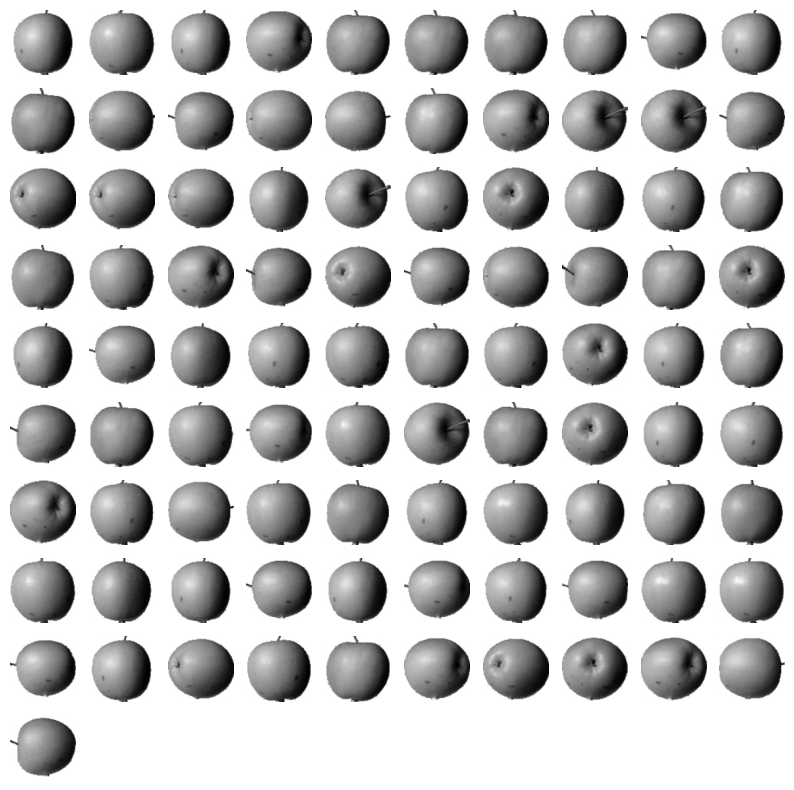

In [28]:
#레이블이 0인 과일 사진 모두 그려보기

#불리언 인덱싱으로 True인 위치의 원소만 모두 추출

draw_fruits(fruits[km.labels_==0])

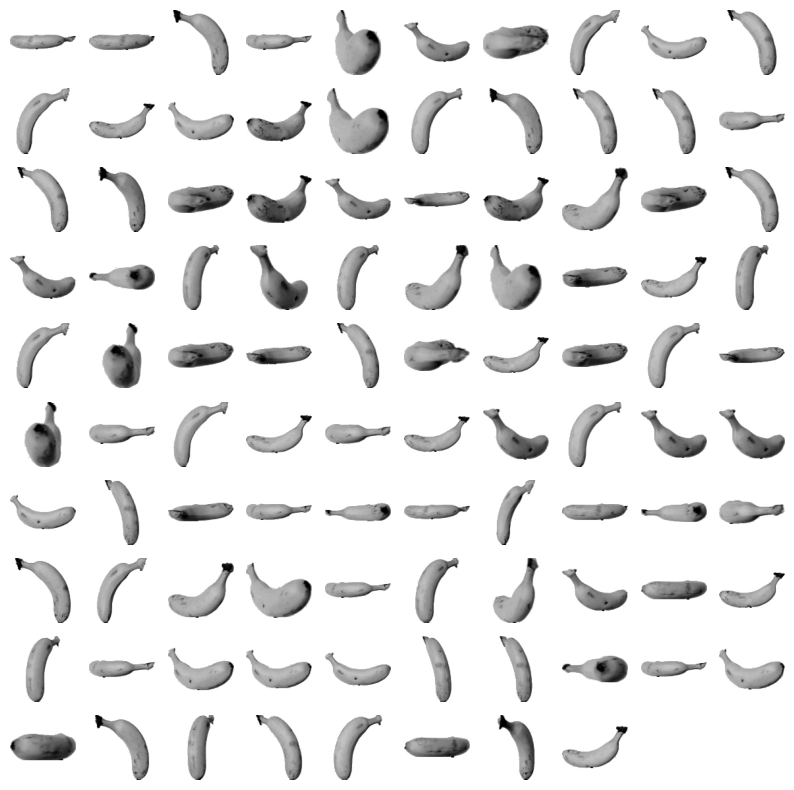

In [29]:
#레이블 1

draw_fruits(fruits[km.labels_==1])

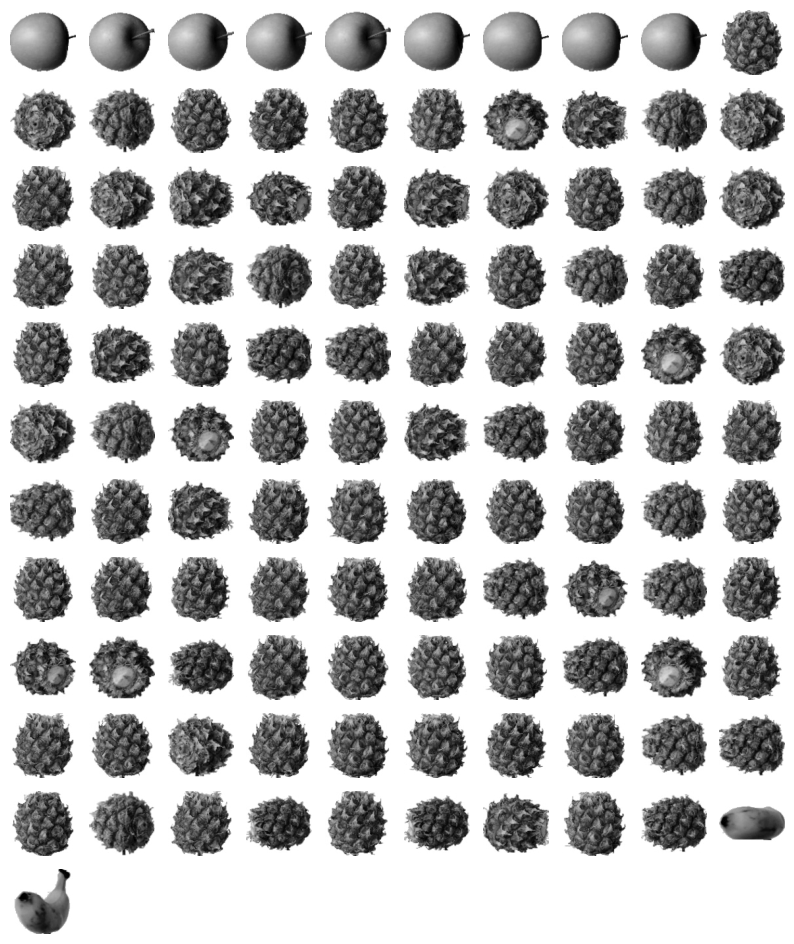

In [30]:
#레이블 2

draw_fruits(fruits[km.labels_==2])

레이블 1 : 바나나로만 이루어진 클러스터

레이블 2 : 주로 파인애플이나, 다른 과일들이 좀 섞여있음

-> k 평균 알고리즘으로 과일을 완벽히 분류해내지 못함

-> 그래도 타깃 데이터가 주어지지 않은 상황에서 비교적 과일 별로 잘 모아냄

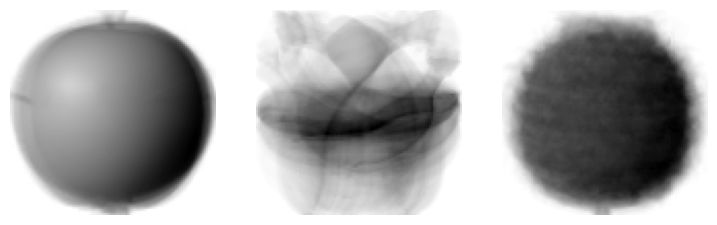

In [31]:
#KMeans가 찾은 클러스터 중심 확인
#100 * 100 크기의 2차원 배열로 바꿔서 출력

draw_fruits(km.cluster_centers_.reshape(-1, 100, 100), ratio=3)

In [32]:
#훈련 데이터 샘플에서 클러스터 중심까지의 거리 확인
#샘플 하나를 전달
print(km.transform(fruits_2d[100:101]))

[[5267.70439881 8837.37750892 3393.8136117 ]]


첫번째 클러스터(레이블0) 까지의 거리 : 5267

두번째 클러스터(레이블1) 까지의 거리 : 8837

세번째 클러스터(레이블2) 까지의 거리 : 3393


위 샘플은 세번째 클러스터 까지의 거리가 가장 가까움

-> 이 샘플은 세번째 클러스터(레이블 2) 에 속할 것으로 예상됨

In [33]:
#위 샘플의 가장 가까운 클러스터 중심 예측

print(km.predict(fruits_2d[100:101]))

[2]


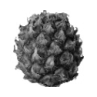

In [34]:
#레이블 2는 파인애플 이었음
#이 샘플이 파인애플이 맞는지 이미지로 확인

draw_fruits(fruits[100:101])

In [35]:
#k-평균 알고리즘은 반복적으로 클러스터 중심을 옮기면서, 최적의 클러스터를 찾는 알고리즘
#반복한 횟수 확인

print(km.n_iter_)

4


실전에서는 클러스터 개수를 몇개로 설정해야 같은 샘플끼리 묶이는 최적의 군집이 형성될 지 모름.

-> n_cluster 하이퍼파라미터를 몇으로 해야할 지 알 수 없음


[n_cluster 하이퍼파라미터를 몇개로 해야할 지, 즉 클러스터를 몇개로 설정할 지 확인하는 방법]

최적의 k 찾기)

k-평균 알고리즘의 단점 : 클러스터 개수를 사전에 지정해줘야 함

실전 -> 몇개의 클러스터가 있는지 알 수 없음


*이너셔 : 클러스터 중심과 클러스터에 속한 샘플 사이의 거리의 제곱 합

-> 클러스터에 속한 샘플이 얼마나 가깝게 모여 있는지를 나타내는 값


- 일반적으로 클러스터 개수가 줄어들면, 각 클러스터에 속한 샘플 수가 늘어나므로 이너셔 값이 커짐

- 반대로 클러스터 개수가 늘어나면, 각 클러스터에 속한 샘플 수가 줄어들어서 이너셔 값이 작아짐


*엘보우 방법 : 클러스터 개수를 늘려가면서, 이너셔의 변화를 관찰하여 최적의 클러스터 개수를 찾는 방법


클러스터 개수를 늘려가면서 이너셔를 그래프로 그리면 감소하는 속도가 꺾이는 지점이 나타남

-> 이 지점부터는 클러스터 개수를 늘려도 클러스터에 잘 밀집된 정도가 크게 개선되지 않음(같은 샘플끼리 묶인 클러스터가 여러개 생겨버림)

-> 즉, 이너셔가 크게 줄어들지 않음

이 지점이 마치 팔꿈치 모양이라서 엘보우 방법이라 칭함

C:\Users\sangm\anaconda3\envs\moabb\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sangm\anaconda3\envs\moabb\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\sangm\anaconda3\envs\moabb\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sangm\anaconda3\envs\moabb\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a mem

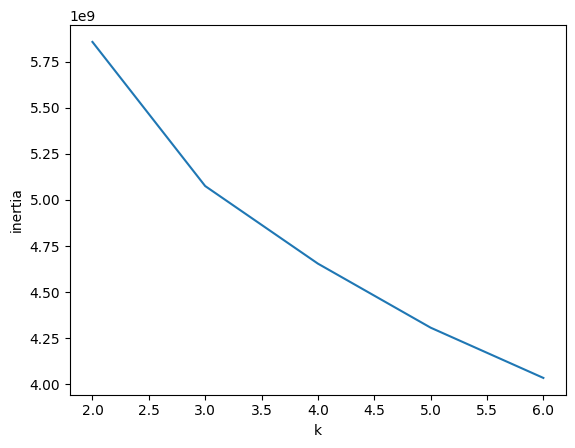

In [36]:
#엘보우 방법으로 최적의 클러스터 k 개수 찾기
#KMeans 클래스는 자동으로 이너셔를 계산해서 제공함



#이너셔 값을 저장할 리스트
inertia = []

#k를 2~6까지 바꿔가며 KMeans 클래스 5번 훈련
for k in range(2,7):
    km=KMeans(n_clusters=k, random_state=42)
    
    #fit() 메서드로 훈련한 후, 이너셔값을 inertia 리스트에 추가
    km.fit(fruits_2d)
    inertia.append(km.inertia_)
    
#리스트에 저장된 이너셔 값을 그래프로 출력
plt.plot(range(2,7), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

이너셔 값이 감소하는 도중 꺾이는 지점 : k=3

엘보우 지점보다 클러스터 개수가 많아지면 이너셔의 변화가 줄어들면서 군집효과도 줄어듦

-> 군집효과가 줄어든다는게 무슨 뜻일까?)

예를 들어 사과 6개, 바나나 6개, 파인애플 6개가 있다고 하자

최적의 군집은 각 과일 6개씩이 묶이는 경우일 것이다.

그러려면 클러스터 개수가 3개가 되어야 한다 (k=3)

그런데 이때, 클러스터 개수가 5개가 되면 ?

같은 과일끼리 묶인 클러스터가 1개 이상이 될 것이다

->(ex : (사과3) / (사과3) / (바나나3) / (바나나3) / (파인애플6))

이렇게 되면 군집 알고리즘의 목표인 "같은 샘플로만 이루어진 군집 이루기"가 실패한 것은 아니지만, 같은 샘플끼리 묶인 클러스터가 쓸데 없이 2개가 생겼다

이런 경우를 군집효과가 줄어들었다고 말한다.

반대로, 클러스터 개수가 너무 적어서 같은 샘플끼리만 묶이는 군집이 충분하지 못한 경우도 군집 효과가 줄어든다고 말한다.

-> (ex : (사과6, 바나나6) / (파인애플6))


[정리]

k가 너무 큰 경우 : 군집이 과도하게 세분화

k가 너무 작은 경우 : 다른 샘플들이 하나의 군집으로 합쳐짐

---------------------------------------------------------------------------------------------------------------

[군집 효과가 줄어드는 상황]

1. 데이터 분포가 모호함

- 데이터 포인트들이 명확한 그룹을 이루지 않고, 균일하게 퍼져 있을 때

예를 들어, 원래 두 개의 군집이 있어야 하지만 데이터가 서로 섞여 있으면 군집 효과가 감소함


2. 군집 간 경계가 불분명함

- 서로 다른 군집이 겹치거나, 거리가 가까워서 명확한 경계를 설정하기 어려운 경우

예를 들어, K-Means 같은 거리 기반 군집화에서는 군집이 원형 형태로 형성되는데, 데이터가 복잡한 구조(비선형)일 경우 군집 효과가 약해질 수 있음


3. 고차원 데이터 문제 (차원의 저주)

- 데이터 차원이 높아질수록 군집 간의 거리 차이가 상대적으로 작아지고, 모든 데이터가 비슷해 보이는 문제가 발생

이로 인해 군집이 뚜렷하게 나뉘지 않음


4. 하이퍼파라미터 설정 문제

- K-Means의 경우, 적절한 K값을 선택하지 않으면 데이터가 올바르게 군집되지 않음

DBSCAN의 경우, eps 값이 너무 크면 하나의 군집으로 합쳐지고, 너무 작으면 군집이 과도하게 세분화됨


5. 특징 선택(feature selection)이 적절하지 않음

- 의미 있는 특징이 아니라 노이즈에 의해 군집이 형성되거나, 중요한 특징이 누락된 경우

예를 들어, 고객 데이터를 군집화할 때 구매 패턴 대신 무의미한 ID 값을 포함하면 군집 효과가 낮아질 수 있음


06-3 주성분 분석)

prob)

너무 많은 사진이 등록되어 저장공간이 부족함

-> 군집이나 분류에 영향을 끼치지 않으면서 업로드된 사진의 용량을 줄일 수 있을까 ?(사진 압축)


task)

사진을 압축하여 용량을 줄이기

차원과 차원 축소)

특성 : 데이터가 가진 속성

ex : 과일 사진의 경우 10,000개의 픽셀로 이루어져 있으므로 10,000개의 특성이 있는 셈

특성 -> 차원

이 차원을 줄일 수 있다면 저장공간을 크게 절약할 수 있을 것


차원 축소 알고리즘(비지도 학습) : 일부 특성을 선택하여 데이터 크기를 줄이고, 지도학습 모델의 성능을 향상시킬 수 있음

+줄어든 차원에서 다시 원본 차원으로 손실을 최대한 줄이면서 복원 가능

주성분 분석(PCA)

"데이터에 있는 분산이 큰 방향을 찾는 것"

- 분산 : 데이터가 널리 퍼져있는 정도

- 분산이 큰 방향 : 데이터를 잘 표현하는 어떤 벡터

- 위에서 찾은 벡터 : 주성분(원본 데이터에 있는 어떤 방향)


*주성분 벡터의 원소 개수 = 원본 데이터셋에 있는 특성 개수

-> 원본 데이터는 주성분을 사용해 차원을 줄일 수 있음


---------------------------------------------------------------------

1. 주성분은 원본 차원과 같음
2. 주성분으로 바꾼 데이터는 차원이 줄어듦
3. 주성분 = 분산이 가장 큰 방향 -> 주성분에 투영하여 바꾼 데이터는 원본이 가지고 있는 특성을 가장 잘 나타내고 있을 것

*결국 주성분 분석의 목표는 의미가 큰 특성들만 남겨서 차원을 줄이는 것(크게 중요하지 않은 특성들은 생략)


In [70]:
#데이터 준비


import wget

# 다운로드할 URL 및 저장할 파일 이름
url = "https://bit.ly/fruits_300_data"
output = "fruits_300_data.npy"

wget.download(url, out=output)


import numpy as np
fruits = np.load('fruits_300_data.npy')
fruits_2d = fruits.reshape(-1, 100*100)

 36% [...........................                                               ] 1097728 / 3000128

 66% [.................................................                         ] 1990656 / 3000128

 89% [..................................................................        ] 2678784 / 3000128

100% [..........................................................................] 3000128 / 3000128

In [71]:
#사이킷런의 PCA 클래스로 주성분 분석 알고리즘 사용
from sklearn.decomposition import PCA

#n_components 매개변수로 주성분 개수 지정
pca = PCA(n_components=50)

#비지도 학습이므로, 타깃값 미제공
pca.fit(fruits_2d)

PCA(n_components=50)

In [72]:
#PCA 클래스가 찾은 주성분 배열 확인

print(pca.components_.shape)

(50, 10000)


(지정한 차원 수, 원본 차원 수)

-> 50개의 주성분을 찾은 것

In [76]:
#이미지 그리기 함수

def draw_fruits(arr, ratio=1):
    n = len(arr)
    
    rows = int(np.ceil(n/10))
    
    cols = n if rows < 2 else 10
    
    fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze=False)
    
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:
                axs[i, j].imshow(arr[i*10+j], cmap='gray_r')
                
            axs[i, j].axis('off')
            
    plt.show()

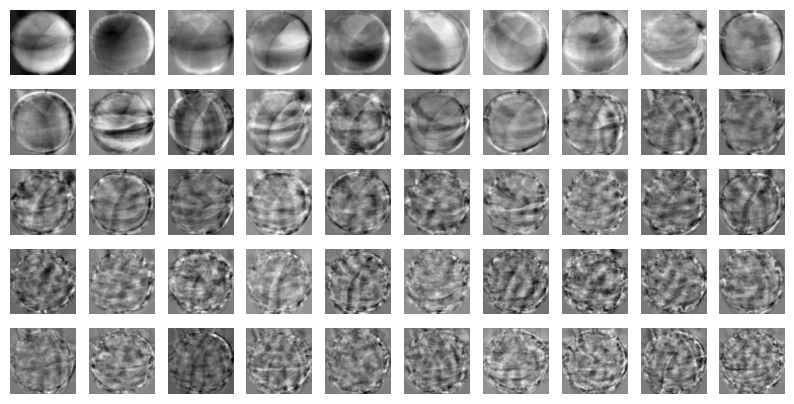

In [77]:
#원본 데이터와 차원이 같음 -> 주성분을 100*100 크기의 이미지로 출력 가능

draw_fruits(pca.components_.reshape(-1, 100, 100))

주성분 : 원본 데이터에서 가장 분산이 큰 방향을 순서대로 나타낸 것

(데이터셋에 있는 어떤 특징을 잡아낸 것으로 생각 가능)


주성분을 찾았으므로, 원본 데이터를 주성분에 투영하여 특성 개수를 10,000개에서 50개로 줄일 수 있음

-> 원본 데이터를 각 주성분으로 분해

In [78]:
#원본 데이터의 차원을 50으로 줄이기(찾은 주성분 개수만큼)

print(fruits_2d.shape)

(300, 10000)


In [79]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


fruits_2d 원본 : (300, 10000) -> 300개의 샘플 이미지, 각 이미지별 10,000의 크기(픽셀값 or 특성)

transform 이후

fruits_2d 변환 : (300, 50) -> 300개의 샘플 이미지, 각 이미지별 50의 크기(픽셀값 or 특성)


*fruits_2d 대신 fruits_pca를 저장하면 저장 공간을 훨씬 절약할 수 있음

원본 데이터 재구성)

10,000개의 특성을 50개로 줄이면서, 손실이 발생

-> 하지만 최대한 분산이 큰 방향으로 데이터를 투영했기 때문에, 원본 데이터를 상당 부분 재구성 가능

In [80]:
#앞서 50개의 차원으로 축소한 fruits_pca데이터를 10,000개의 특성으로 복원

fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


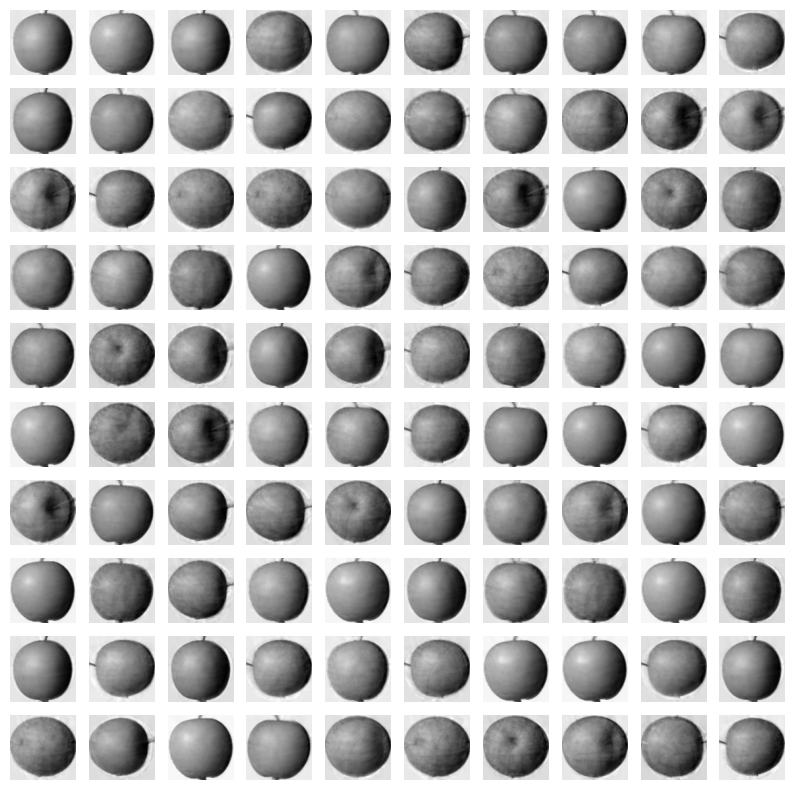

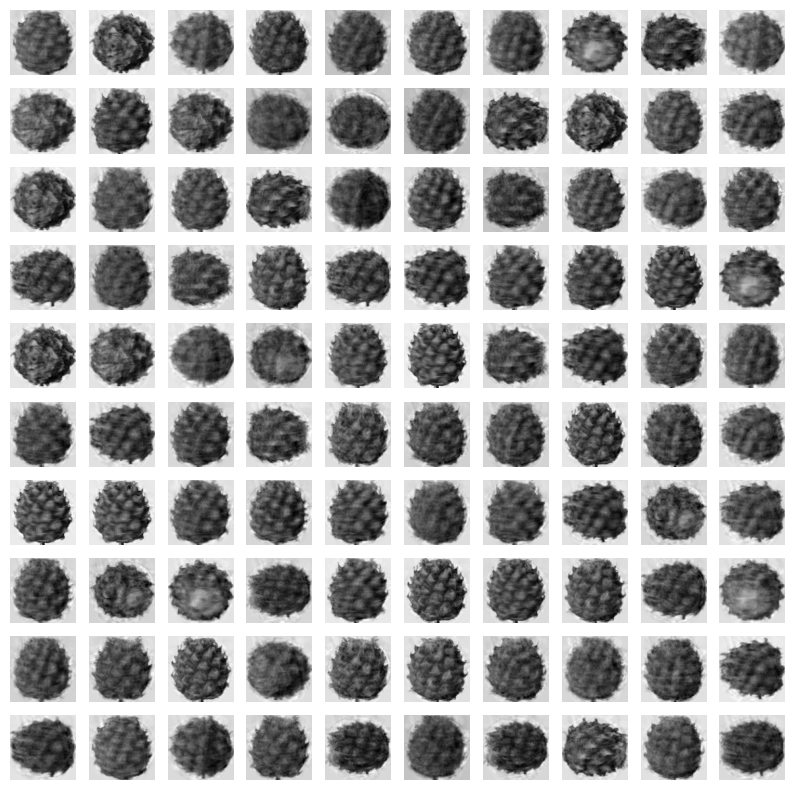

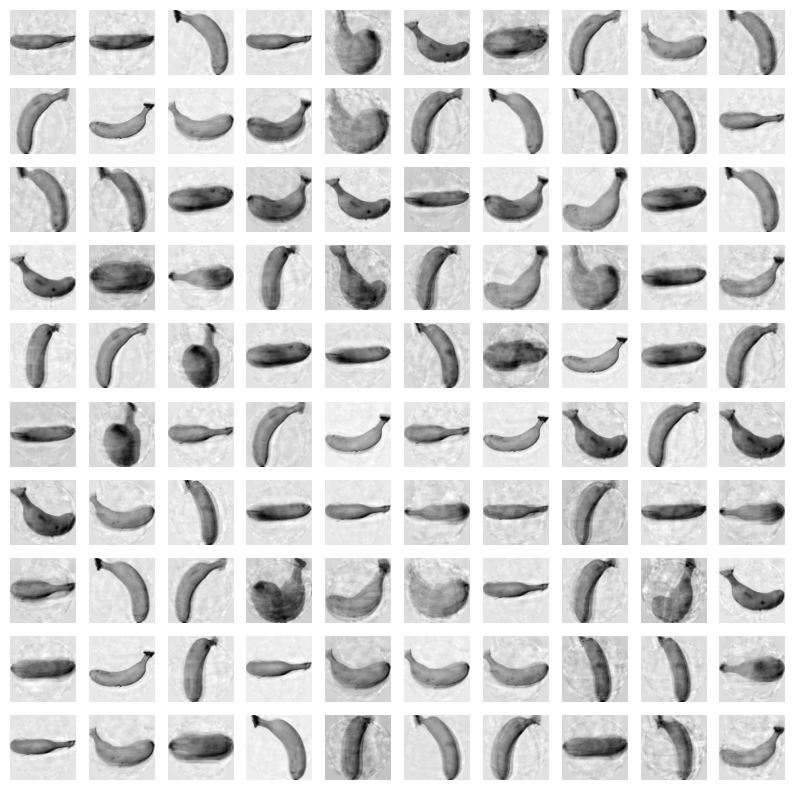

In [81]:
#복원한 데이터를 100*100 크기로 바꾸어 100개씩 나누어 출력
#순서대로 사과, 파인애플, 바나나를 100개씩 담고 있음

fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)

for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print("\n")

모든 과일이 잘 복원됨

-> 이 50개의 특성이 분산을 가장 잘 보존하도록 변환된 것이기 때문

- 주성분을 최대로 사용했다면 완벽하게 원본 데이터를 재구성할 수 있을 것

설명된 분산)

주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값

- 첫번째 주성분의 설명된 분산이 가장 큼
- explained_variance_ratio_에 각 주성분의 설명된 분산 비율이 기록되어 있음
- 이 분산 비율을 모두 더하면 50개의 주성분으로 표현하고 있는 총 분산 비율을 얻을 수 있음

In [82]:
#분산 비율을 모두 더해 50개의 주성분으로 표현하고 있는 총 분산 비율 확인

print(np.sum(pca.explained_variance_ratio_))

0.9215471090374117


50개의 주성분 : 92%가 넘는 분산을 유지하고 있음(원본 데이터에서 92% 이상의 중요 특성을 보존하고 있다는 뜻)

-> 그래서 원본 데이터를 복원했을 때 원본 이미지의 품질이 높았던 것

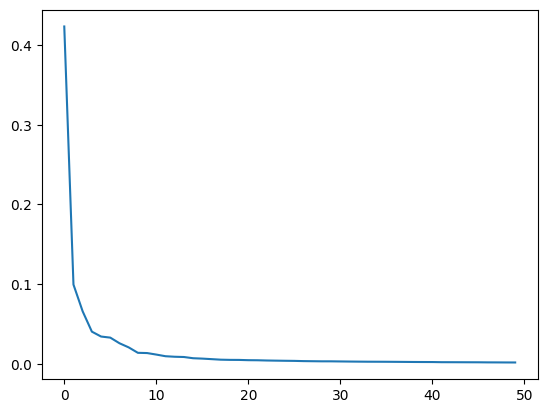

In [83]:
#설명된 분산의 비율을 그래프로 시각화
#시각화 : 적절한 주성분의 개수를 찾는데 도움이 됨

plt.plot(pca.explained_variance_ratio_)
plt.show()

처음 10개의 주성분이 대부분의 분산을 표현하고 있음

-> 이후의 주성분이 설명하고 있는 분산은 비교적 작음

In [84]:
#PCA로 차원 축소된 데이터 사용 -> 지도 학습 모델 훈련
#원본 데이터를 사용했을 때와의 차이 확인하기

#3개의 과일 사진 분류
#로지스틱 회귀 사용

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

지도 학습 모델을 사용하려면 타깃값 필요

사과 : 0

파인애플 : 1

바나나 : 2

In [108]:
#각 정수로 이루어진 타깃 데이터 만들기

target = np.array([0]*100 + [1]*100 + [2]*100)

In [109]:
#원본 데이터 사용
#로지스틱 회귀 모델에서 성능 가늠 -> 교차 검증 수행

from sklearn.model_selection import cross_validate

scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
0.9490666389465332


교차 검증 점수 : 0.99666

원본 데이터는 특성이 10,000개나 되므로, 300개의 샘플에서 금방 과대적합 됨

각 교차 검증 폴드의 훈련 시간 : 0.86초

In [110]:
#pca로 축소한 데이터 사용

scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9933333333333334
0.03942580223083496


C:\Users\sangm\anaconda3\envs\moabb\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sangm\anaconda3\envs\moabb\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

50개의 특성만 사용했음에도, 정확도가 100%

훈련 시간 : 0.03초

-> PCA로 훈련 데이터의 차원을 축소하면 저장 공간 뿐만 아니라, 머신러닝 모델의 훈련 속도도 높일 수 있음

In [111]:
#앞서서는 주성분의 개수를 미리 지정해 줬음
#대신, 원하는 설명된 분산의 비율을 입력할 수 있음 -> 특정 비율의 설명된 분산까지 자동으로 주성분을 찾음
#지정된 비율에 도달할 때 까지 자동으로 주성분 찾는 PCA 클래스 사용


#설명된 분산의 50%에 달하는 주성분 찾도록 하는 PCA 모델 생성
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [112]:
#찾은 주성분의 개수 확인

print(pca.n_components_)

2


단 2개의 주성분 만으로 원본 데이터에 있는 분산의 50% 표현 가능 !

In [113]:
#이 모델로 원본 데이터 변환
#주성분이 2개이므로, 변환된 데이터의 크기는 (300,2)

fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [114]:
#2개의 특성만 가지고 학습한 모델의 교차 검증 점수 확인

scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9933333333333334
0.03972373008728027


C:\Users\sangm\anaconda3\envs\moabb\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sangm\anaconda3\envs\moabb\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

2개의 특성만을 사용해서 99%의 정확도 달성


*발생한 경고 : 로지스틱 회귀 모델이 완전히 수렴하지 못했으니, 반복 횟수를 증가하라는 경고

-> 교차 검증의 결과가 충분히 좋기 때문에, 무시해도 됨

In [115]:
#차원 축소된 데이터를 사용해 k-평균 알고리즘으로 클러스터 찾기

from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2]), array([110,  99,  91], dtype=int64))


C:\Users\sangm\anaconda3\envs\moabb\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sangm\anaconda3\envs\moabb\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


fruits_pca로 찾은 클러스터는 각각 110개, 99개, 91개의 샘플을 포함하고 있음

-> 원본 데이터를 사용했을 때와 거의 비슷한 결과

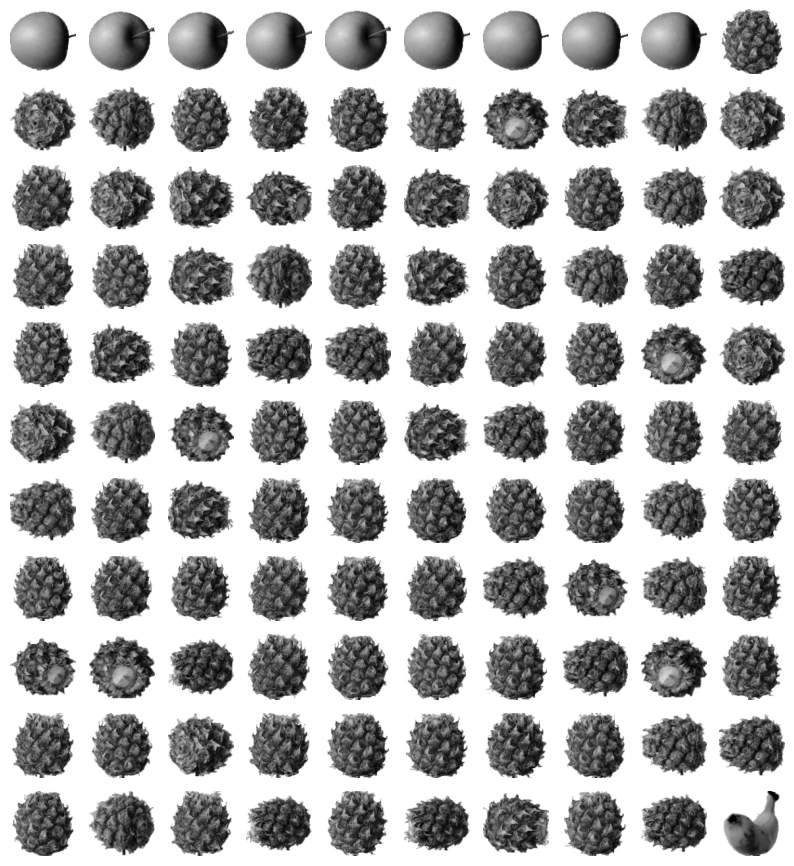

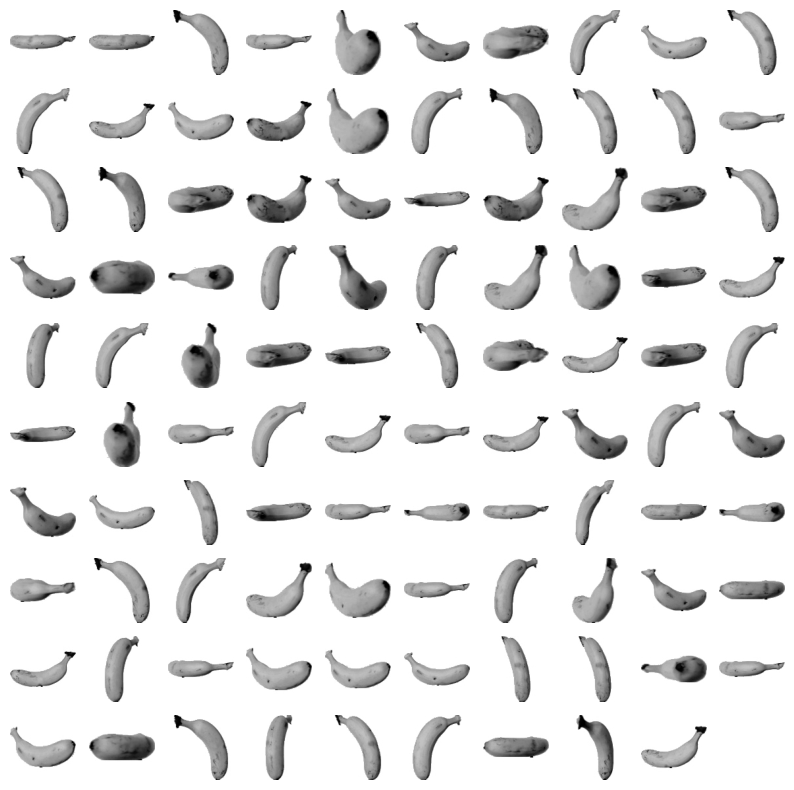

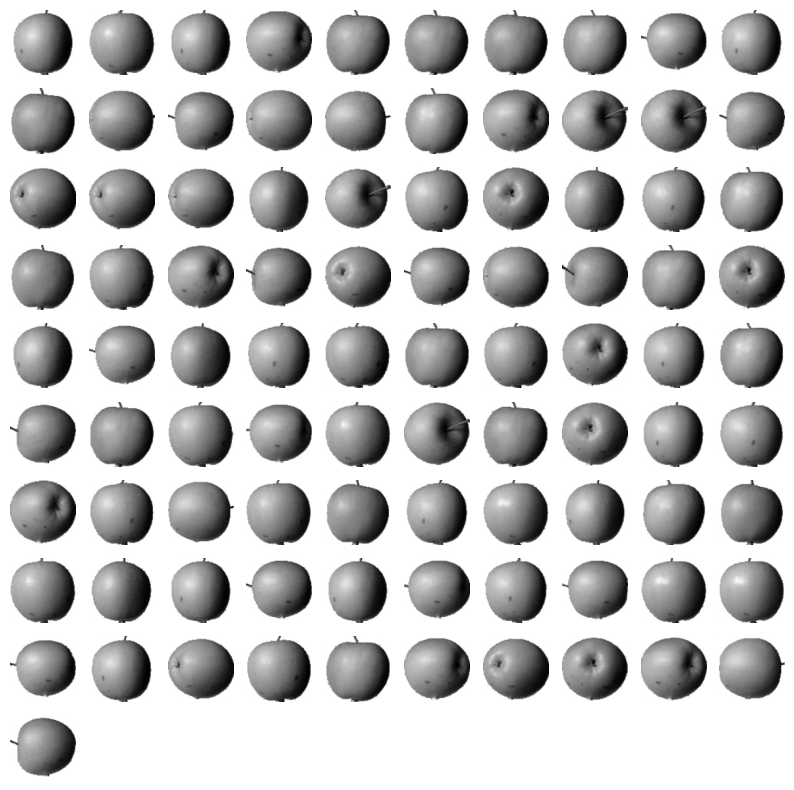

In [116]:
#KMeans가 찾은 레이블을 사용해 과일 이미지 출력

for label in range(0, 3):
    draw_fruits(fruits[km.labels_ == label])
    print("\n")

사과와 파인애플은 약간 혼동되는 편 (몇개의 사과가 파인애플 클러스터에 포함됨)

*차원을 줄이면서 얻는 장점 : 시각화

-> 3개 이하로 차원을 줄이면 화면에 출력하기 비교적 쉬움

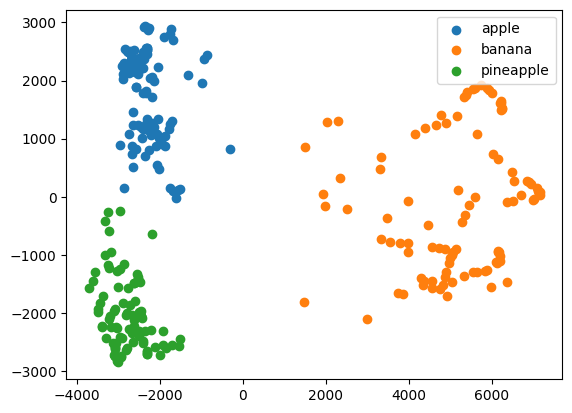

In [107]:
#클러스터 별로 나누어 산점도 그리기

for label in range(0, 3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:,0], data[:,1])
    
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()

각 클러스터의 산점도가 아주 잘 구분 됨

-> 2개의 특성만을 사용했는데 로지스틱 회귀 모델의 교차 검증 점수가 99%에 달하는 이유

*(산점도 상에서 사과와 파인애플 클러스터의 경계가 아주 가깝게 붙어 있음)

-> 이 두 클러스터의 샘플은 몇개가 혼동을 일으킬 가능성이 있음

